<a href="https://colab.research.google.com/github/Arshiya109/python1/blob/main/MODULE_4_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 4 Project

Project for Module: Perceptron and Gradient Descent

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

Example 1 - A simple cost function


In [ ]:
def f(x):
    return x ** 2 + x + 1

In [ ]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

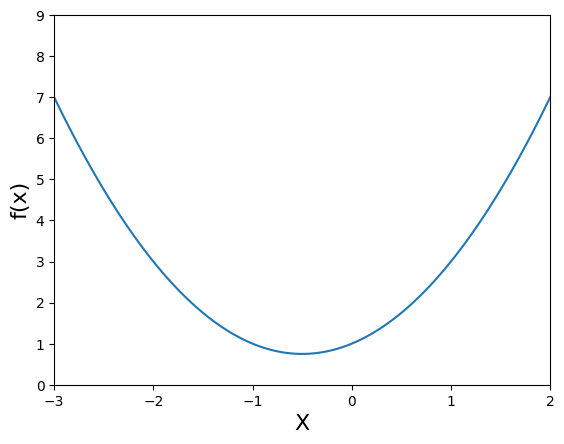

In [ ]:
# Plot
plt.xlim(-3, 2)
plt.ylim(0, 9)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

Slope & Derivatives

In [ ]:
def df(x):
    return 2 * x + 1

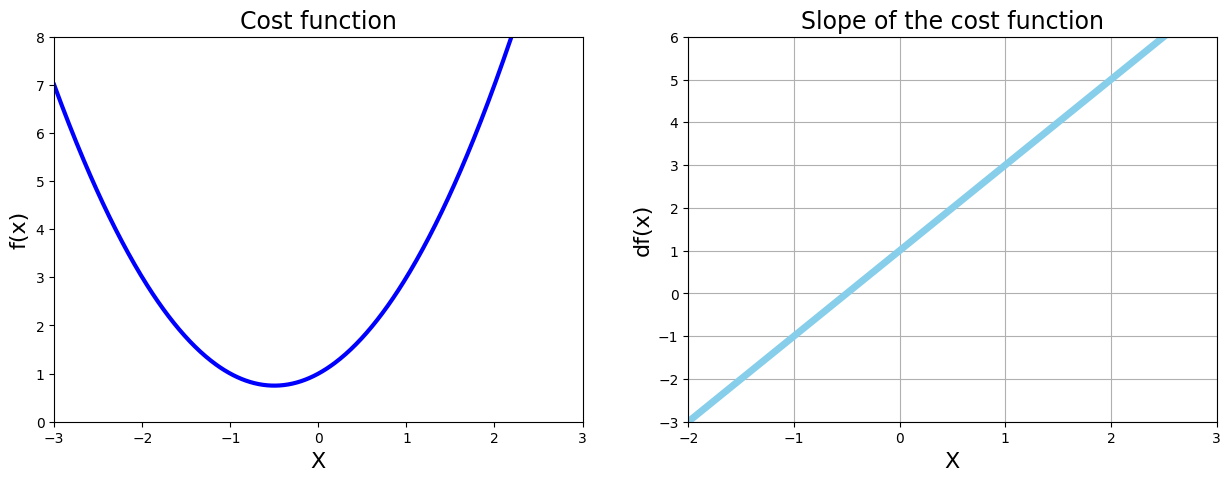

In [ ]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

In [ ]:
# Define the function f(x) and its derivative df(x)
def f(x):
    return x**4 - 12*x**3 + 42*x**2 - 48*x + 16

def df(x):
    return 4*x**3 - 36*x**2 + 84*x - 48

# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.01  # Smaller step multiplier
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(new_x)  # [REQUIRED] Calculate the gradient
    new_x = previous_x - step_multiplier * gradient  # [REQUIRED] Update the value of new_x

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(df(new_x))  # [REQUIRED]

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))




Loop ran this many times: 21
Local minimum occurs at: 5.669075863652187
Slope or df(x) value at this point is: -0.0001982750717388626
f(x) value or cost at this point is: -59.76561087125583


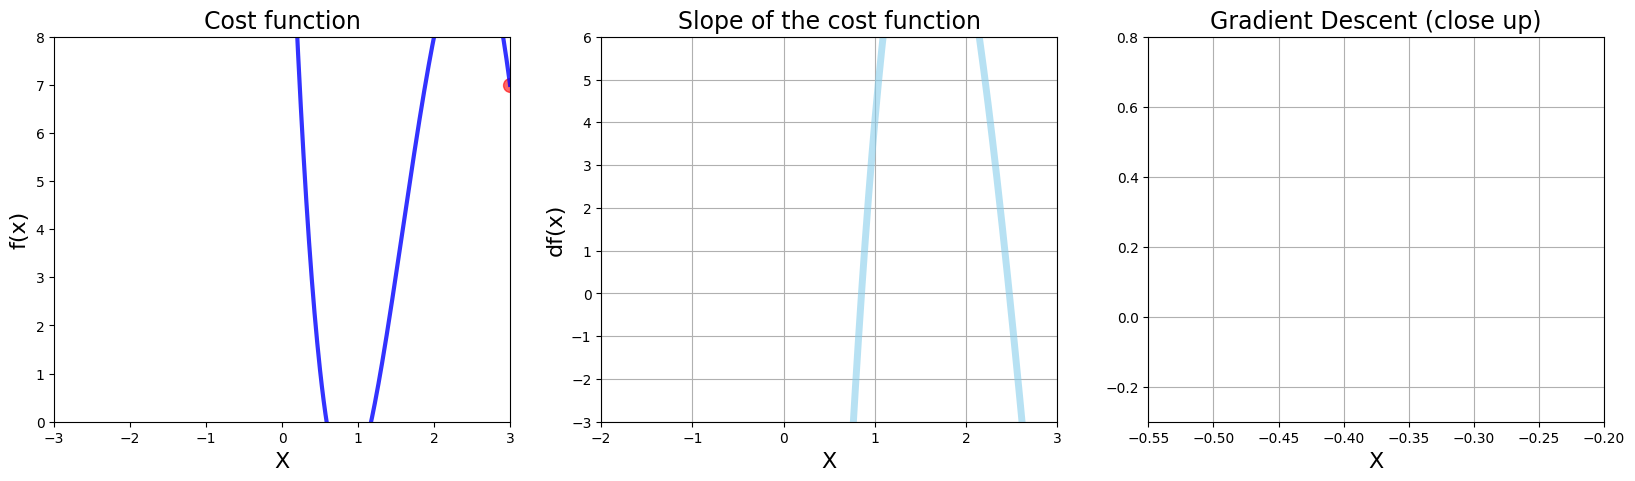

In [ ]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

In [ ]:
import numpy as np

##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return 2 * x**2 + np.sin(5 * x)  # [REQUIRED]

def dg(x):
    return 4 * x + 5 * np.cos(5 * x)  # [REQUIRED]


## TASK-3 : Plot function and derivative side by side like has been done earlier

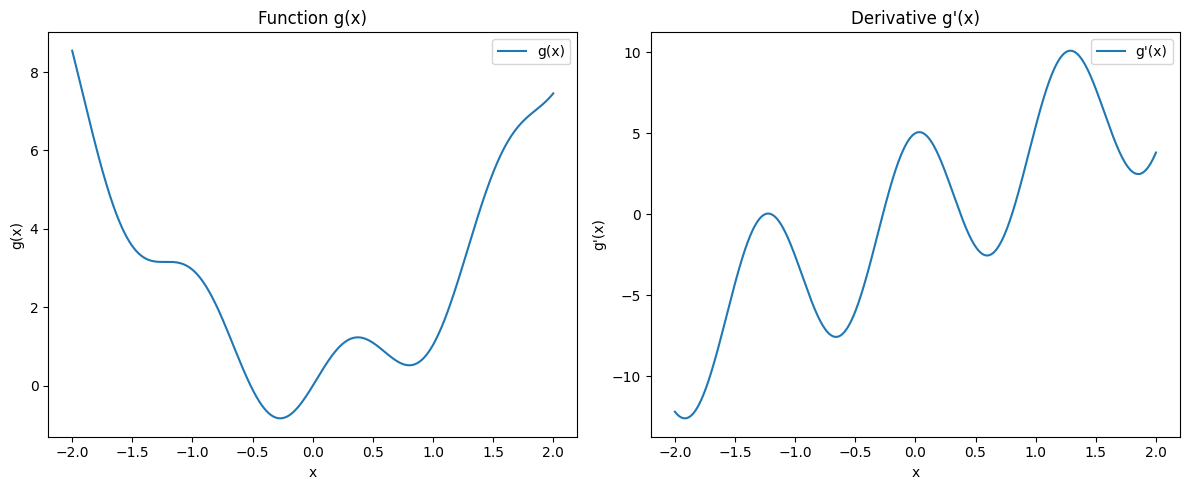

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return 2 * x**2 + np.sin(5 * x)  # [REQUIRED]

def dg(x):
    return 4 * x + 5 * np.cos(5 * x)  # [REQUIRED]

# Plot function and its derivative side by side
plt.figure(figsize=(12, 5))

# Plot the function g(x)
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), label='g(x)')
plt.title('Function g(x)')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()

# Plot the derivative dg(x)
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), label="g'(x)")
plt.title("Derivative g'(x)")
plt.xlabel("x")
plt.ylabel("g'(x)")
plt.legend()

plt.tight_layout()
plt.show()


Gradient Descent

In [ ]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [ ]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 0.8022764904807179
Number of steps: 14


In [ ]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -0.27073557307959445
Number of steps: 22


In [ ]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -0.2698470048325148
Number of steps: 8


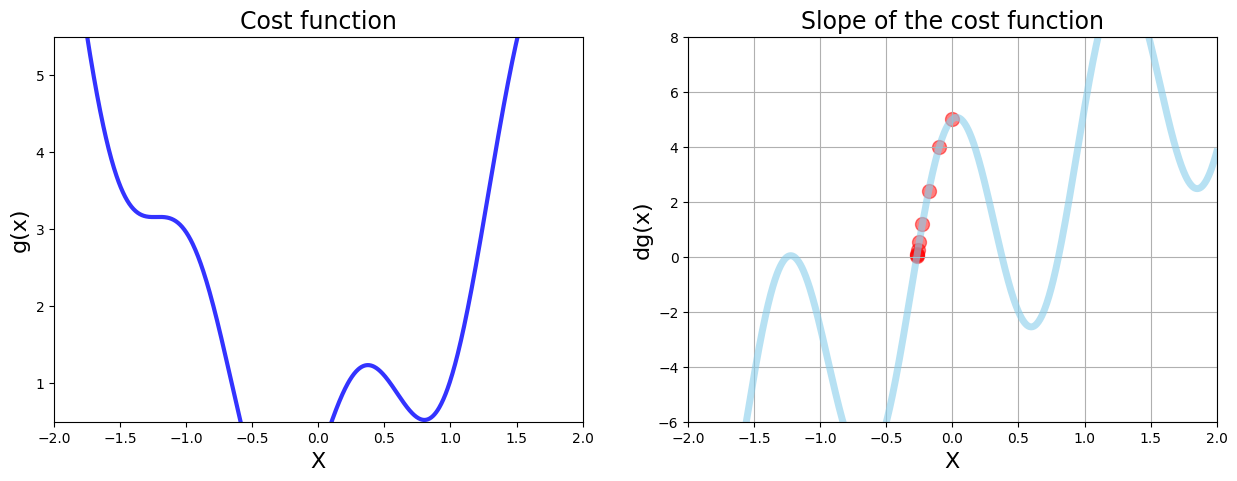

In [ ]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

Example 3 - Divergence and Overflow

## TASK-4 : Code the same things as they were done for the first two examples

Local minimum occurs at: -0.5144525624299401
Slope or dg(x) value at this point is: -6.26912237530847
g(x) value at this point is: -0.009744842471895665


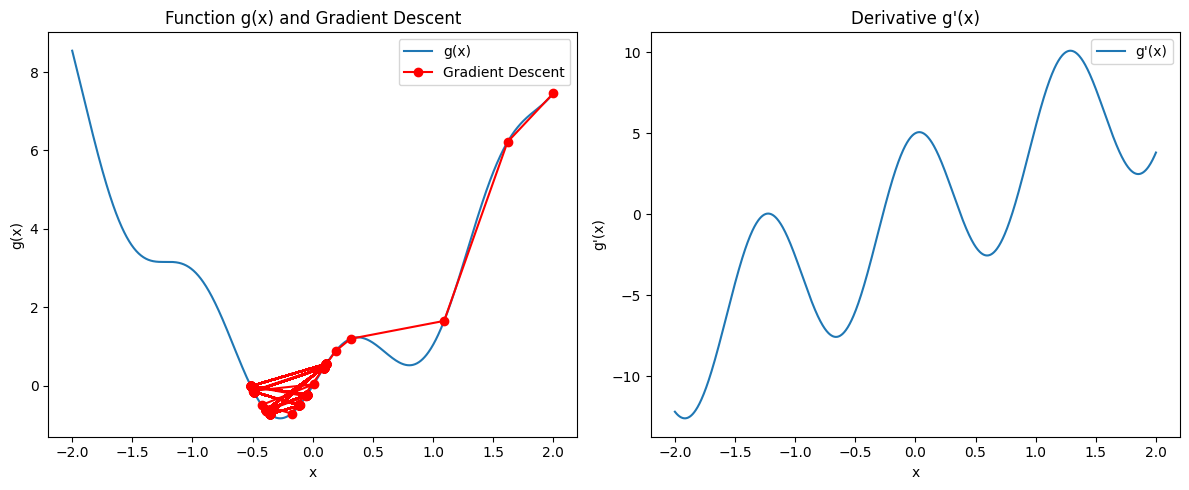

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return 2 * x**2 + np.sin(5 * x)  # [REQUIRED]

def dg(x):
    return 4 * x + 5 * np.cos(5 * x)  # [REQUIRED]

# Gradient Descent
new_x = 2  # Initial guess
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
g_values = [g(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = dg(new_x)  # [REQUIRED] Calculate the gradient
    new_x = previous_x - step_multiplier * gradient  # [REQUIRED] Update the value of new_x

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    g_values.append(g(new_x))  # [REQUIRED]

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or dg(x) value at this point is:', dg(new_x))
print('g(x) value at this point is:', g(new_x))

# Plot function and its derivative side by side
plt.figure(figsize=(12, 5))

# Plot the function g(x)
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), label='g(x)')
plt.plot(x_list, g_values, 'ro-', label='Gradient Descent')
plt.title('Function g(x) and Gradient Descent')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()

# Plot the derivative dg(x)
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), label="g'(x)")
plt.title("Derivative g'(x)")
plt.xlabel("x")
plt.ylabel("g'(x)")
plt.legend()

plt.tight_layout()
plt.show()


The Learning Rate

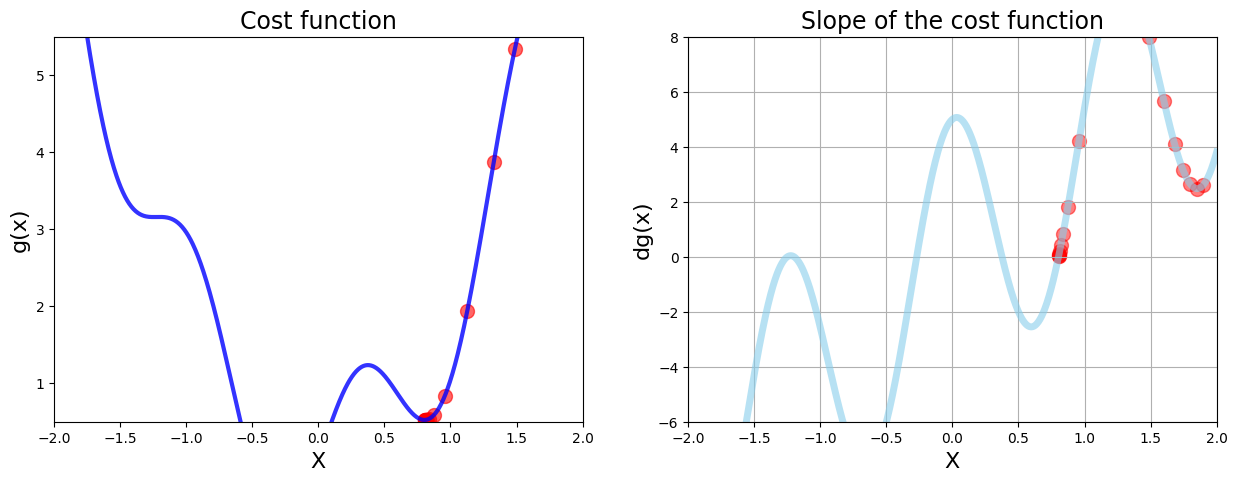

Number of steps is:  18


In [ ]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

## TASK-5 : Run gradient descent 3 times
## TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)


mid_gamma =## [REQUIRED]
high_gamma =## [REQUIRED]

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.25, precision=0.0001, max_iter=n)

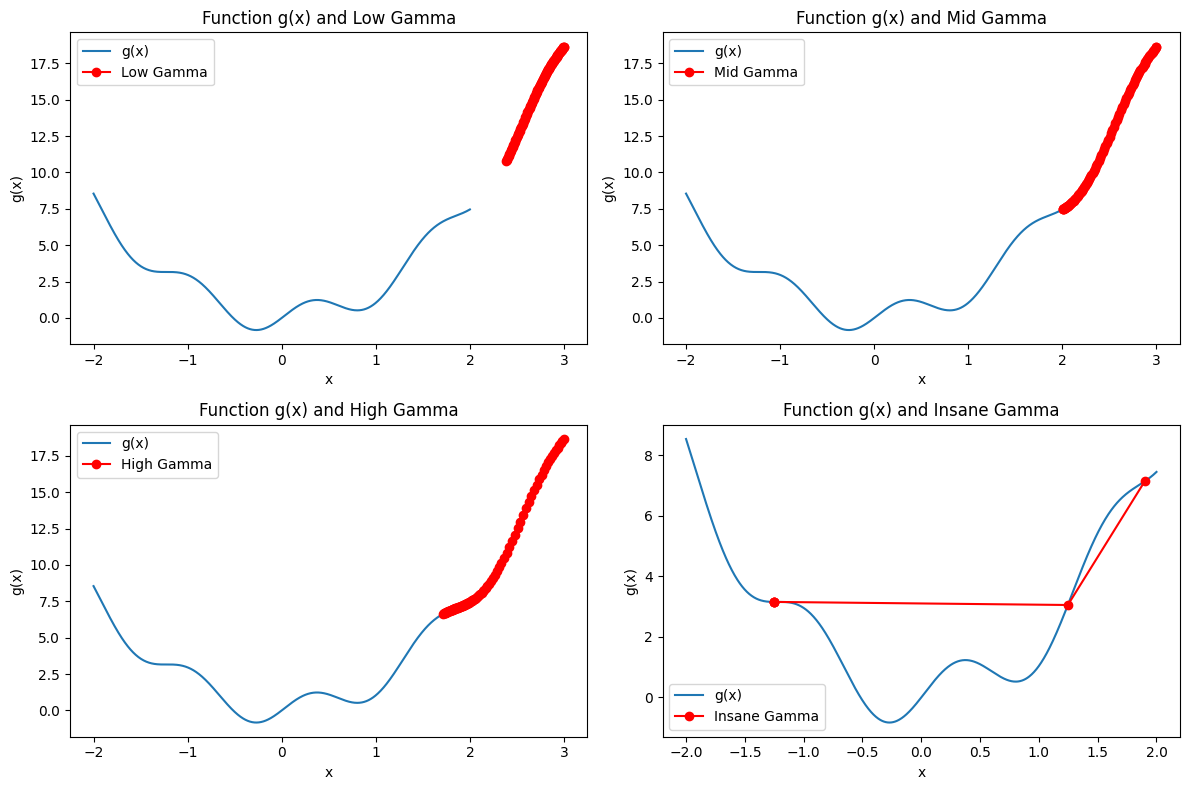

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(derivative_func, initial_guess, multiplier, precision, max_iter):
    x = initial_guess
    x_list = [x]

    for _ in range(max_iter):
        x = x - multiplier * derivative_func(x)
        x_list.append(x)

        if abs(derivative_func(x)) < precision:
            break

    return x_list

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return 2 * x**2 + np.sin(5 * x)

def dg(x):
    return 4 * x + 5 * np.cos(5 * x)

# TASK-5 : Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)  # [REQUIRED]
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)  # [REQUIRED]

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
plt.figure(figsize=(12, 8))

# Plot the function g(x)
plt.subplot(2, 2, 1)
plt.plot(x_2, g(x_2), label='g(x)')
plt.plot(low_gamma, [g(x) for x in low_gamma], 'ro-', label='Low Gamma')
plt.title('Function g(x) and Low Gamma')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x_2, g(x_2), label='g(x)')
plt.plot(mid_gamma, [g(x) for x in mid_gamma], 'ro-', label='Mid Gamma')  # [REQUIRED]
plt.title('Function g(x) and Mid Gamma')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x_2, g(x_2), label='g(x)')
plt.plot(high_gamma, [g(x) for x in high_gamma], 'ro-', label='High Gamma')  # [REQUIRED]
plt.title('Function g(x) and High Gamma')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x_2, g(x_2), label='g(x)')
plt.plot(insane_gamma, [g(x) for x in insane_gamma], 'ro-', label='Insane Gamma')
plt.title('Function g(x) and Insane Gamma')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()

plt.tight_layout()
plt.show()


## TASK-7 : Plot reduction in cost for each iteration

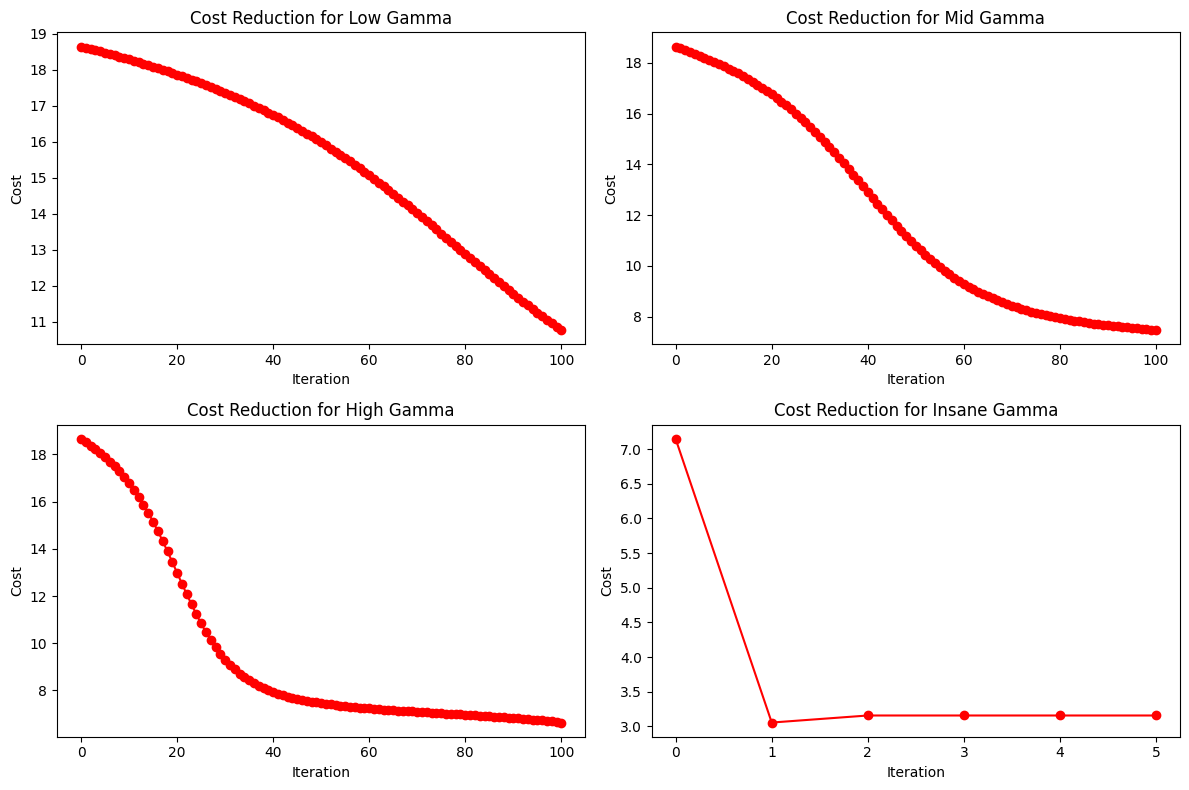

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(derivative_func, initial_guess, multiplier, precision, max_iter):
    x = initial_guess
    x_list = [x]
    cost_list = [g(x)]  # Initial cost

    for _ in range(max_iter):
        x = x - multiplier * derivative_func(x)
        x_list.append(x)
        cost_list.append(g(x))

        if abs(derivative_func(x)) < precision:
            break

    return x_list, cost_list

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return 2 * x**2 + np.sin(5 * x)

def dg(x):
    return 4 * x + 5 * np.cos(5 * x)

# TASK-5 : Run gradient descent 3 times
n = 100
low_gamma, low_gamma_costs = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)
mid_gamma, mid_gamma_costs = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma, high_gamma_costs = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma, insane_gamma_costs = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# TASK-7 : Plot reduction in cost for each iteration
plt.figure(figsize=(12, 8))

# Plot cost reduction for low_gamma
plt.subplot(2, 2, 1)
plt.plot(range(len(low_gamma_costs)), low_gamma_costs, 'ro-')
plt.title('Cost Reduction for Low Gamma')
plt.xlabel('Iteration')
plt.ylabel('Cost')

# Plot cost reduction for mid_gamma
plt.subplot(2, 2, 2)
plt.plot(range(len(mid_gamma_costs)), mid_gamma_costs, 'ro-')
plt.title('Cost Reduction for Mid Gamma')
plt.xlabel('Iteration')
plt.ylabel('Cost')

# Plot cost reduction for high_gamma
plt.subplot(2, 2, 3)
plt.plot(range(len(high_gamma_costs)), high_gamma_costs, 'ro-')
plt.title('Cost Reduction for High Gamma')
plt.xlabel('Iteration')
plt.ylabel('Cost')

# Plot cost reduction for insane_gamma
plt.subplot(2, 2, 4)
plt.plot(range(len(insane_gamma_costs)), insane_gamma_costs, 'ro-')
plt.title('Cost Reduction for Insane Gamma')
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.tight_layout()
plt.show()


Example 4 - Data Viz with 3D Charts

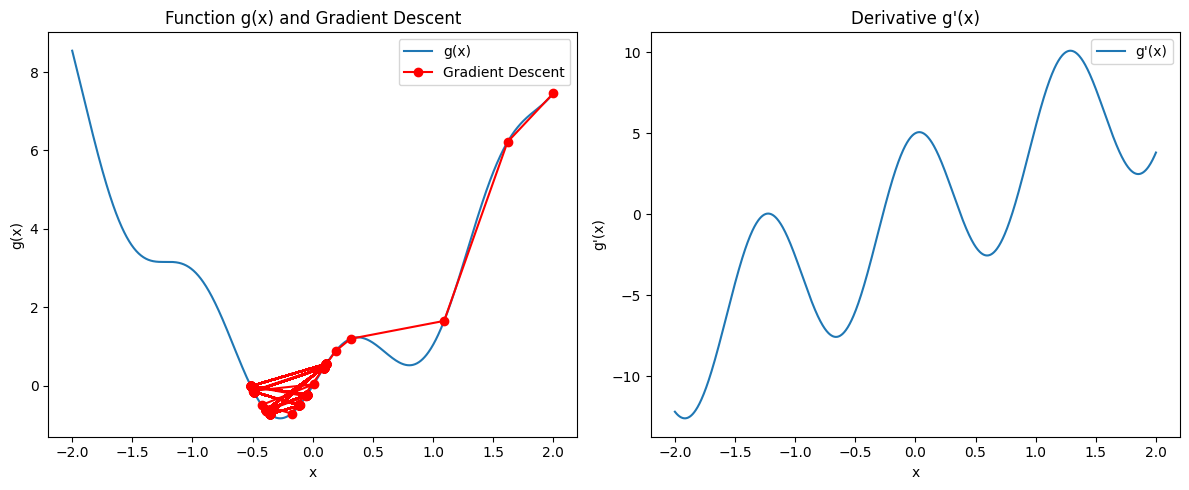

In [ ]:
## TASK-8 : Code the same things as they were done for the first two examples
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(derivative_func, initial_guess, multiplier, precision, max_iter):
    x = initial_guess
    x_list = [x]
    cost_list = [g(x)]  # Initial cost

    for _ in range(max_iter):
        x = x - multiplier * derivative_func(x)
        x_list.append(x)
        cost_list.append(g(x))

        if abs(derivative_func(x)) < precision:
            break

    return x_list, cost_list

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return 2 * x**2 + np.sin(5 * x)

def dg(x):
    return 4 * x + 5 * np.cos(5 * x)

# Gradient Descent
new_x = 2  # Initial guess
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list, cost_list = gradient_descent(derivative_func=dg, initial_guess=new_x, multiplier=step_multiplier, precision=precision, max_iter=500)

# Plot function and its derivative side by side
plt.figure(figsize=(12, 5))

# Plot the function g(x)
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), label='g(x)')
plt.plot(x_list, [g(x) for x in x_list], 'ro-', label='Gradient Descent')
plt.title('Function g(x) and Gradient Descent')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()

# Plot the derivative dg(x)
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), label="g'(x)")
plt.title("Derivative g'(x)")
plt.xlabel("x")
plt.ylabel("g'(x)")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


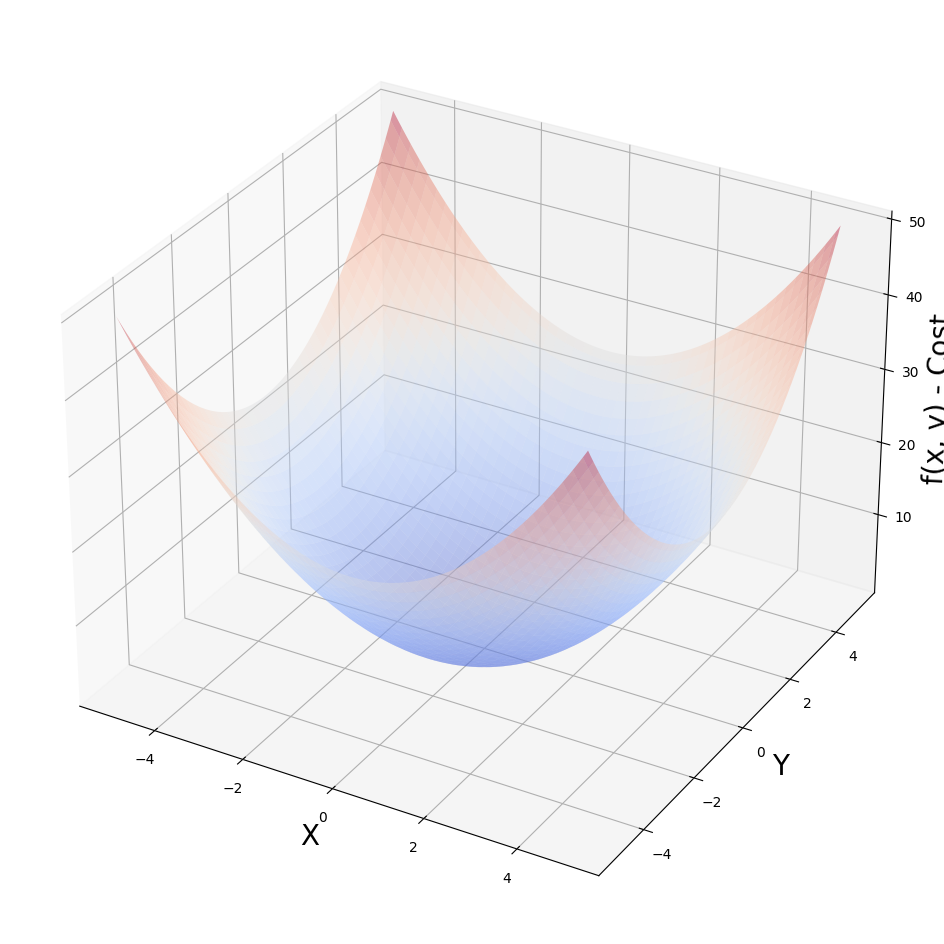

Partial derivative of f with respect to x: 2*x
Partial derivative of f with respect to y: 2*y


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff

# Assuming x_4, y_4, and f(x, y) are defined
# Replace f(x, y) with your actual function definition

def f(x, y):
    return x**2 + y**2  # Replace with your actual function

x_4 = np.linspace(-5, 5, 100)
y_4 = np.linspace(-5, 5, 100)
x_4, y_4 = np.meshgrid(x_4, y_4)

# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Pass the meshgrid values to the function f
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

# Partial Derivatives & Symbolic Computation
x, y = symbols('x y')
f_xy = x**2 + y**2  # [REQUIRED] Define the expression f(x, y)

# Compute the partial derivatives
df_dx = diff(f_xy, x)  # [REQUIRED] Compute the partial derivative of f with respect to x
df_dy = diff(f_xy, y)  # [REQUIRED] Compute the partial derivative of f with respect to y

# Display the partial derivatives
print("Partial derivative of f with respect to x:", df_dx)
print("Partial derivative of f with respect to y:", df_dy)


In [ ]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  x**2 + y**2
Partial derivative wrt x is:  2*y
Value of f(x,y) at x=1.8 y=1.0 is:  4.24000000000000
Value of partial derivative wrt x:  3.60000000000000


Batch Gradient Descent with SymPy

In [ ]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.57835979496953e-48 8.76866552760853e-49]
Minimum occurs at x value of:  6.31343917987813e-49
Minimum occurs at y value of:  3.50746621104341e-49
The cost is:  5.21618334996315e-97


##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return ## [REQUIRED]

def fpy(x, y):
    return ## [REQUIRED]

In [ ]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return 2 * x  # [REQUIRED] Partial derivative of f with respect to x

def fpy(x, y):
    return 2 * y  # [REQUIRED] Partial derivative of f with respect to y


In [ ]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.57835979e-48 8.76866553e-49]
Minimum occurs at x value of:  6.313439179878134e-49
Minimum occurs at y value of:  3.507466211043411e-49
The cost is:  5.216183349963152e-97


Graphing 3D Gradient Descent

In [ ]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [1.86728201e-19 1.03737889e-19]
Minimum occurs at x value of:  7.469128023985783e-20
Minimum occurs at y value of:  4.149515568880998e-20
The cost is:  7.300635289507557e-39


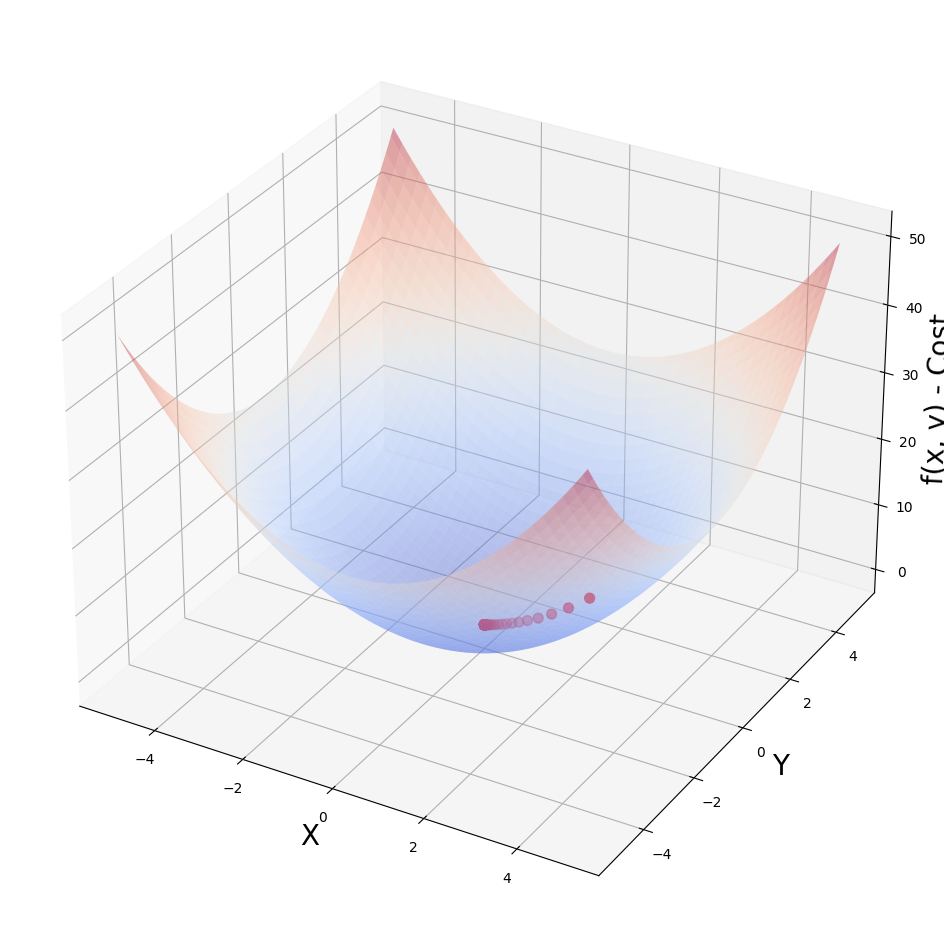

In [ ]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

Example 5 - Working with Data & a Real Cost Function

In [ ]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [ ]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


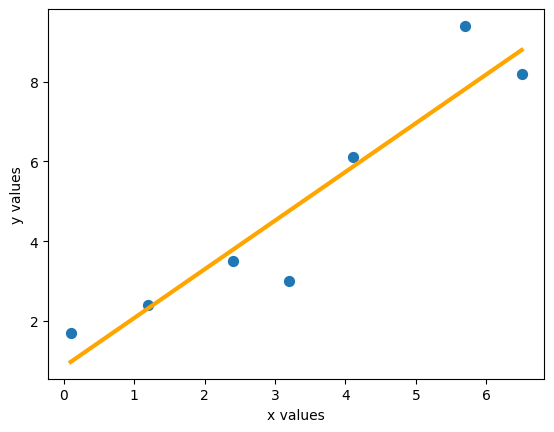

In [ ]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [ ]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [ ]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [ ]:
import numpy as np

def mse(y, y_hat):
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

# Example usage:
# Assuming y and y_hat are numpy arrays
y = np.array([1, 2, 3, 4, 5, 6, 7])
y_hat = np.array([1.1, 2.2, 2.9, 4.2, 5.1, 5.8, 7.2])

mse_result = mse(y, y_hat)
print("Mean Squared Error (MSE):", mse_result)


Mean Squared Error (MSE): 0.027142857142857173


In [ ]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [22.24571429 15.09571429 11.80571429  8.29571429  7.84571429  8.61571429
 13.09571429]
MSE regression using manual calc is 2.451428571428572
MSE regression is 0.9479655759794577


3D Plot for the MSE Cost Function

In [ ]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

Calc MSE using nested for loops


In [ ]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


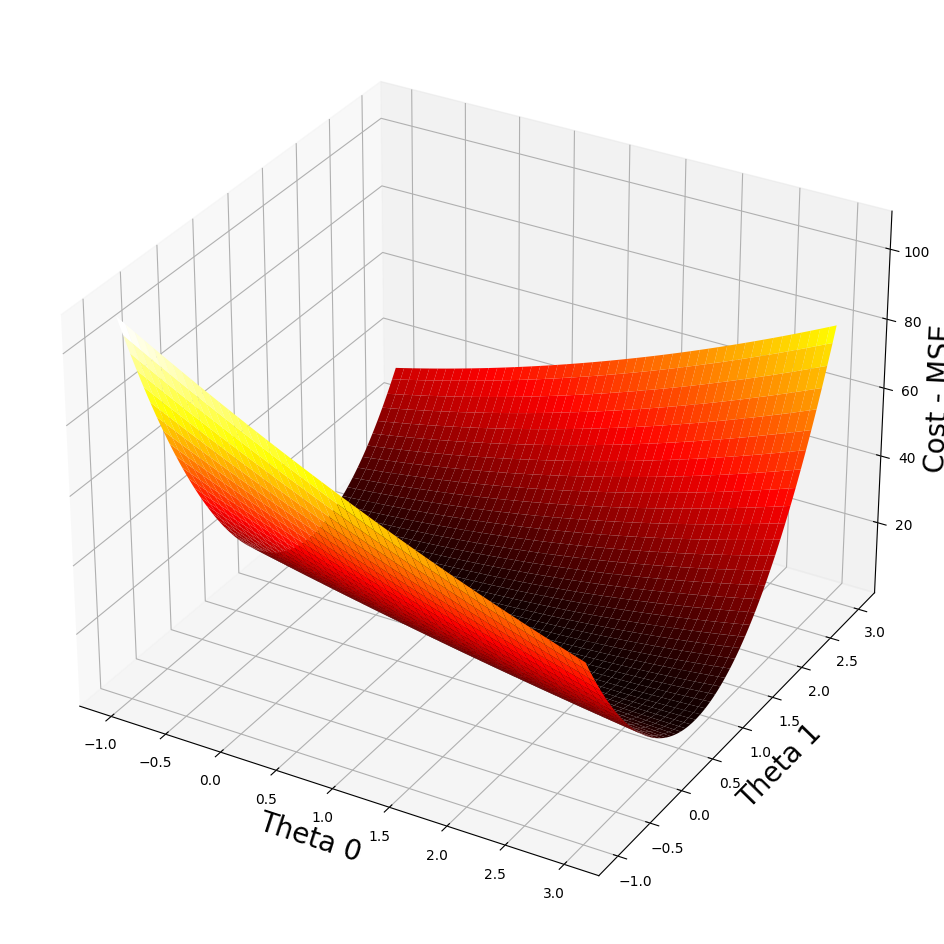

In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [ ]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


In [ ]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [ ]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


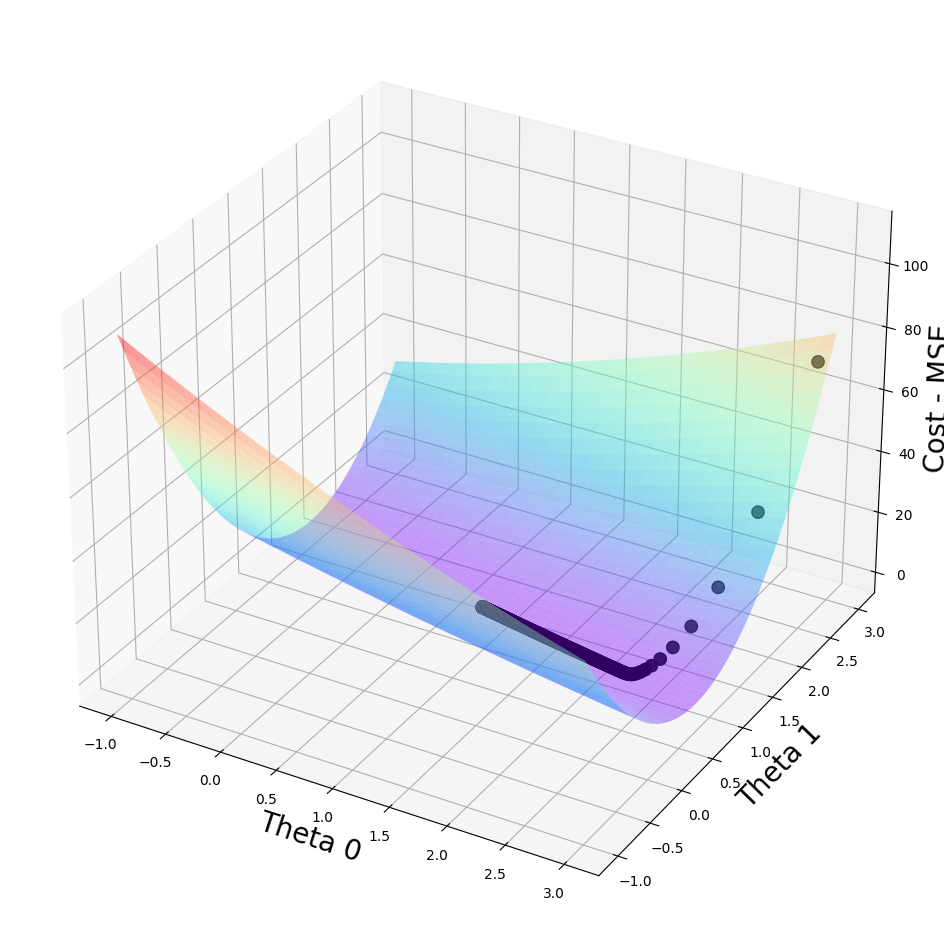

In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()